In [1]:
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
from matplotlib import cm
import seaborn as sns
sns.set_theme()

In [3]:
summary_df = pd.read_csv(Path(Path.home(), "Documents/xray/sample_bench/data/7mhf/182_bench/summary.csv"), index_col=0)
summary_df.head()

,ff,pdb,w_0,cif_name,N_id,job_id,out_dir_id,cifs,w_1,rmsd,N,J
r_free,,,,,,,,,,,,
0.340532,1740.839558,/wynton/group/sali/mhancock/xray/sample_bench/...,1.0,0,0,0,197,0,NaN,0.376931,1,1
0.374582,9022.913545,/wynton/group/sali/mhancock/xray/sample_bench/...,1.0,0,0,1,152,"0,1",NaN,0.616274,1,2
0.217708,2420.009292,/wynton/group/sali/mhancock/xray/sample_bench/...,1.0,0,0,2,10,0,NaN,0.991914,1,1
0.205500,4426.224745,/wynton/group/sali/mhancock/xray/sample_bench/...,1.0,0,0,3,68,"0,1",NaN,0.989098,1,2
0.312844,1694.051222,/wynton/group/sali/mhancock/xray/sample_bench/...,1.0,0,0,4,3,0,NaN,0.830559,1,1


/Users/matthew/opt/anaconda3/envs/plot/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/matthew/opt/anaconda3/envs/plot/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


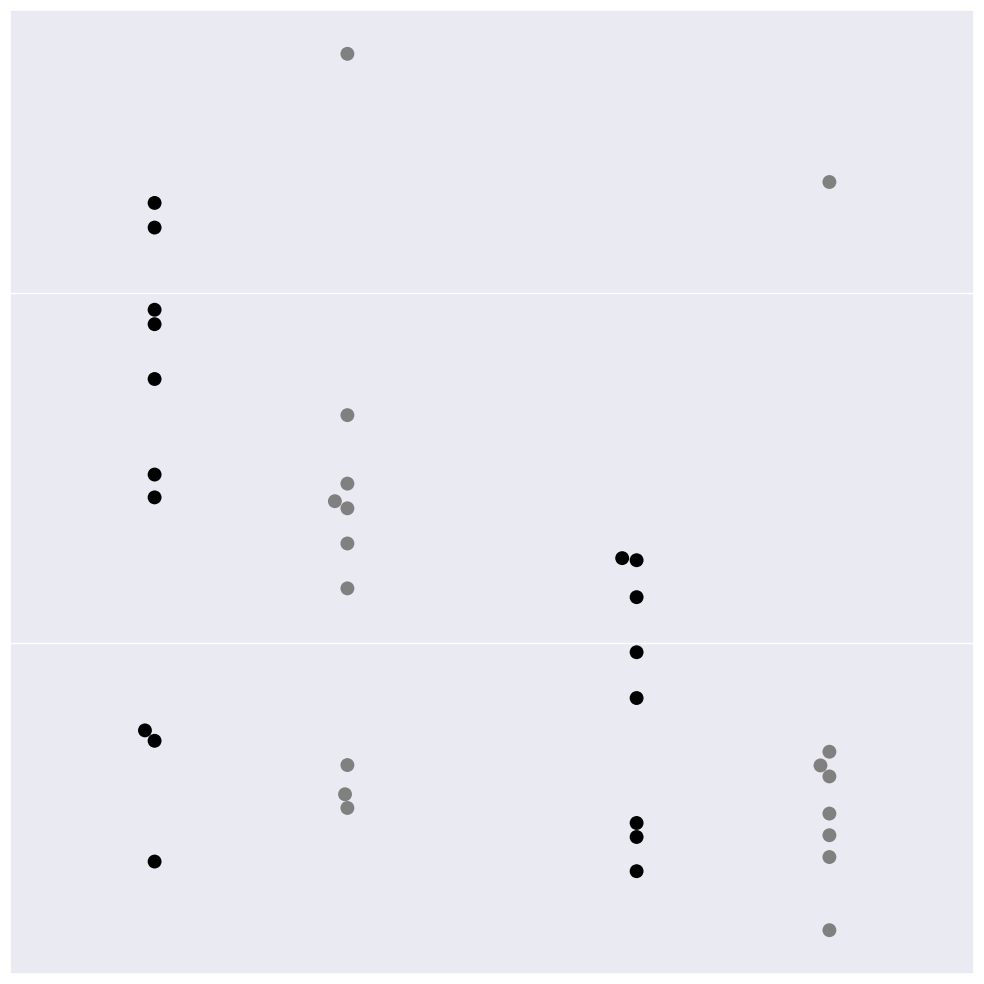

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))

field = "rmsd_0"
ax = sns.swarmplot(x="N", y="r_free", data=summary_df, hue="J", dodge=True, palette=["black", "gray"], legend=None, size=10)
# add_stat_annotation(ax, data=analysis_df, x="N", y="rmsd_0", hue="J",
#                     box_pairs=[((1, 1), (1, 2)),
#                                  ((2, 1), (2, 2)),
#                                  ((4, 1), (4, 2)),
#                                  ((1, 2), (2, 2)),
#                                  ((2, 2), (4, 2))
#                                 ],
#                     test='t-test_paired', text_format='star', loc='inside', verbose=2)

# ax.tick_params(axis='x', labelsize=30)
# ax.tick_params(axis='y', labelsize=30)
ax.xaxis.set_major_locator(ticker.MaxNLocator(3))
ax.yaxis.set_major_locator(ticker.MaxNLocator(3))
ax.tick_params(bottom=False, labelbottom=False)
ax.tick_params(left=False, labelleft=False)
plt.xlabel(None)
plt.ylabel(None)

def two_decimal_places(x, pos):
    return f'{x:.2f}'
ax.yaxis.set_major_formatter(FuncFormatter(two_decimal_places))

plt.tight_layout()
plt.savefig(Path(Path.home(), "Desktop/fig.png"))

